IndexError: list index out of range

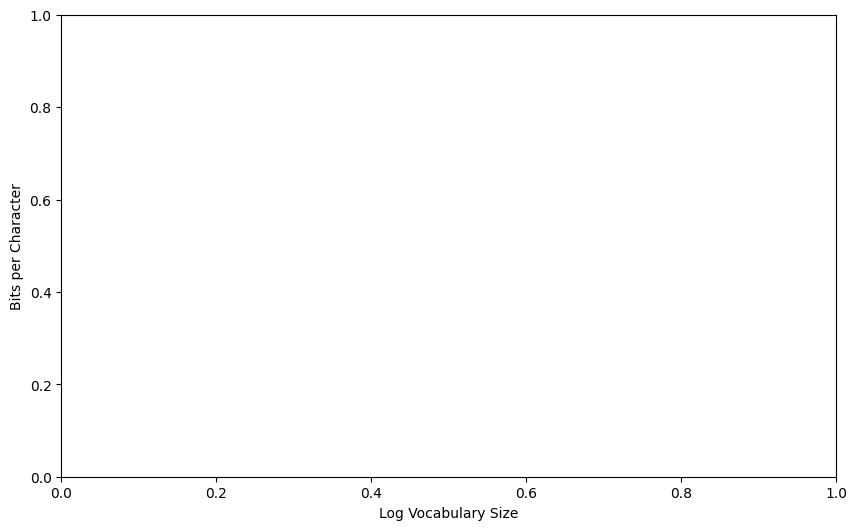

In [3]:
from plot import plot_bpc_vs_vocab_size

base_min_vocab_bpc = 1.7 
base_max_vocab_bpc = 8.9

pkl_dir = "."
plot_bpc_vs_vocab_size(pkl_dir, log_scale_vocab = True, 
                       increase_vocab_size = False,
                       title = "Scaling Vocabulary Curriculum Learning")

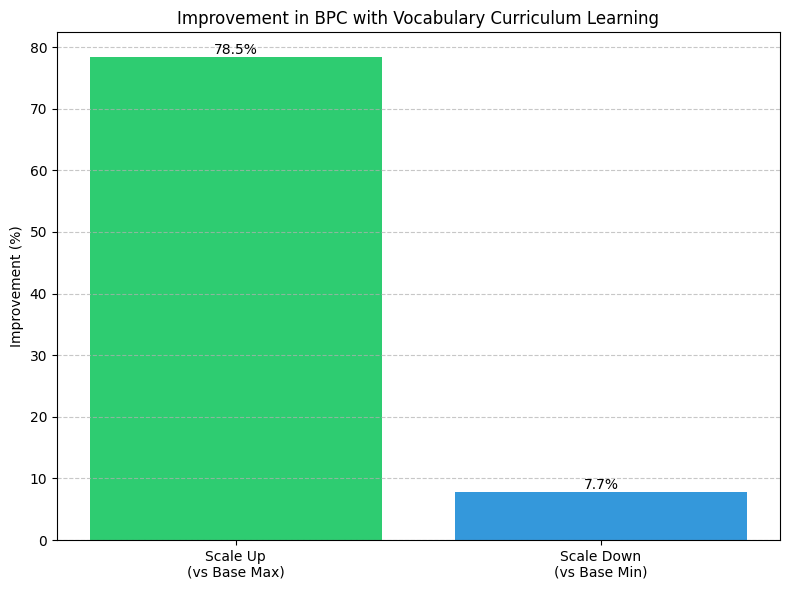

In [4]:
base_min_vocab_bpc = 1.7 
base_max_vocab_bpc = 8.9
scale_up_max_vocab_bpc = 1.9154
scale_down_min_vocab_bpc = 1.5687

import matplotlib.pyplot as plt
import numpy as np

# Calculate improvements
scale_up_improvement = ((base_max_vocab_bpc - scale_up_max_vocab_bpc) / base_max_vocab_bpc) * 100
scale_down_improvement = ((base_min_vocab_bpc - scale_down_min_vocab_bpc) / base_min_vocab_bpc) * 100

# Define the data
improvements = {
    'Scale Up\n(vs Base Max)': scale_up_improvement,
    'Scale Down\n(vs Base Min)': scale_down_improvement
}

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(improvements.keys(), improvements.values(), color=['#2ecc71', '#3498db'])

# Customize the plot
plt.title('Improvement in BPC with Vocabulary Curriculum Learning', fontsize=12)
plt.ylabel('Improvement (%)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [4]:
vocab_sizes

[92, 4359, 7941, 11382, 14819, 18276]

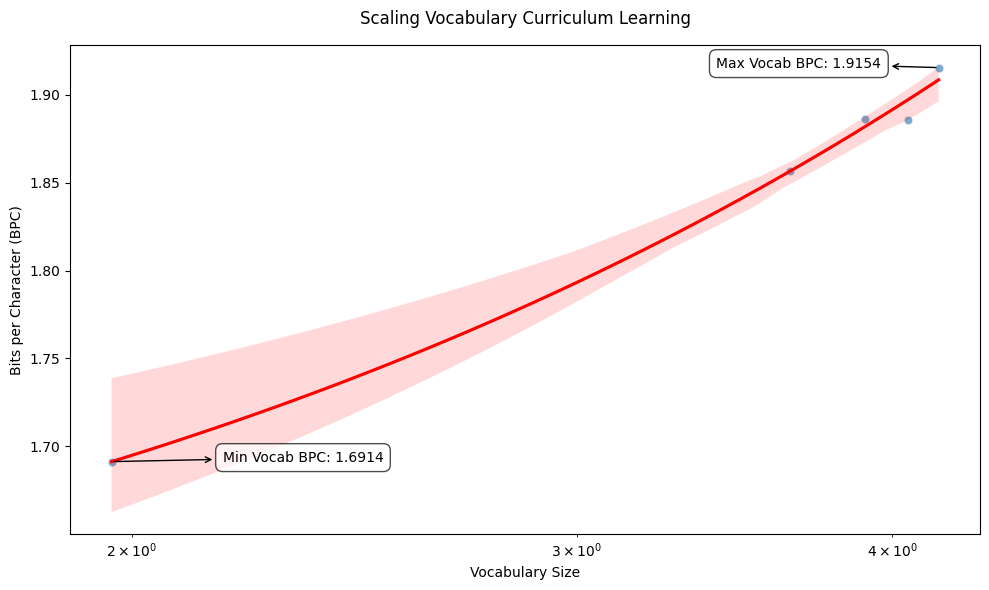

In [2]:
from plot import plot_bpc_vs_vocab_size

pkl_dir = "../run1"
plot_bpc_vs_vocab_size(pkl_dir, log_scale_vocab = True, 
                       increase_vocab_size = True,
                       title = "Scaling Vocabulary Curriculum Learning")

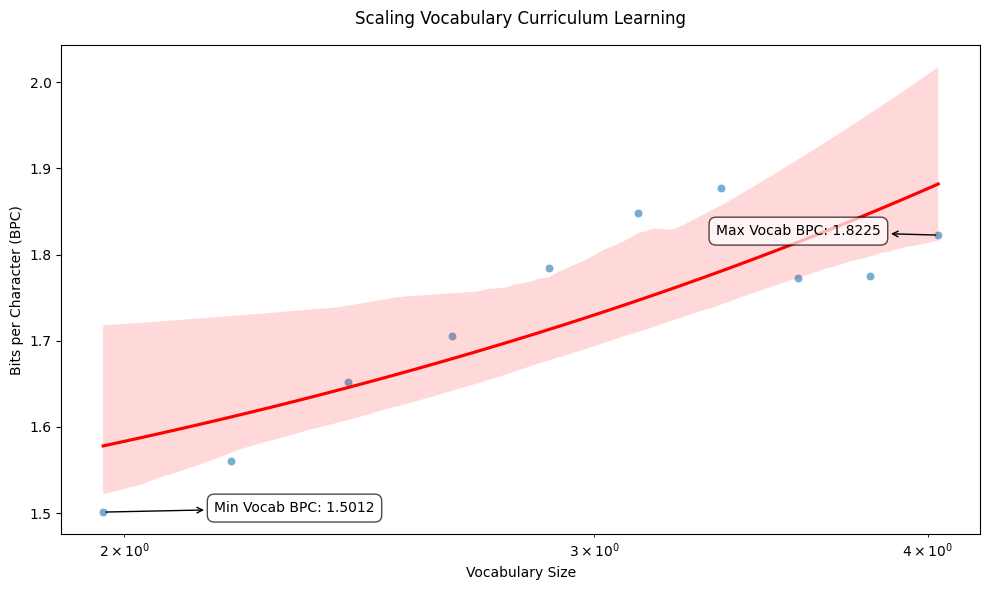

In [1]:
from plot import plot_bpc_vs_vocab_size

pkl_dir = "../run3"
plot_bpc_vs_vocab_size(pkl_dir, log_scale_vocab = True, 
                       increase_vocab_size = True,
                       title = "Scaling Vocabulary Curriculum Learning")

# the 3rd run also demonstrate the 'occilation' on BPC between 1.5 ~ 1.7 for the base vocabulary set-ups

0.8633163302938163

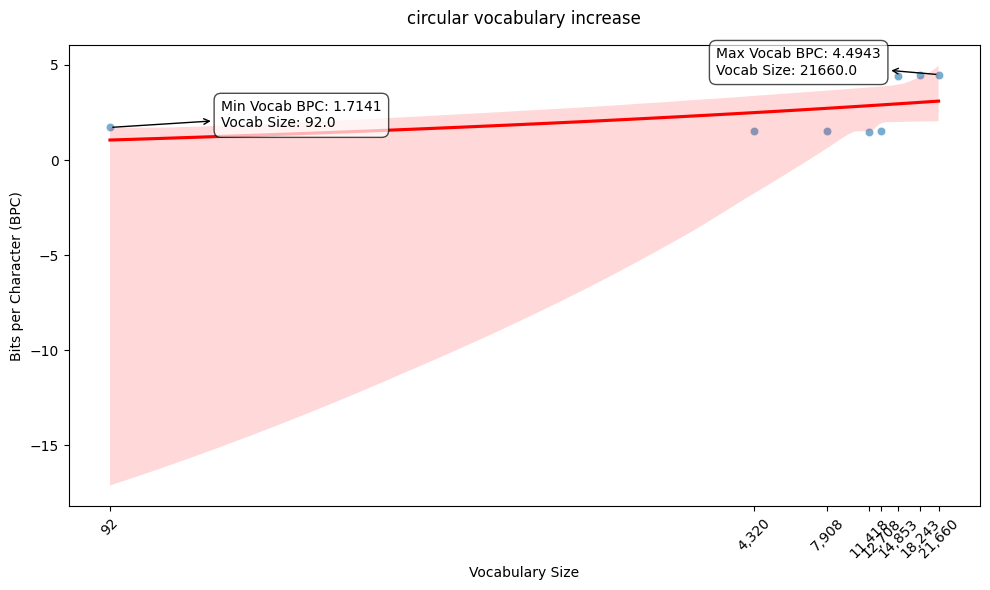

In [22]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab

data = {}
pkl_dir = "../gpt_tiny_cm"
pkl_path = pkl_dir + "/increase_iter*/*.pkl"
vocab_sizes = [92]
bpcs = [1.7141]
for pkl_path in glob.glob(pkl_path):
    if "_raw" in pkl_path: 
        continue
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
    
_plot_bpc_vs_vocab(vocab_sizes, bpcs, log_scale_vocab=True, increase_vocab_size=True, title="circular vocabulary increase")

In [23]:
bpcs

[1.7141,
 1.5161974430084229,
 4.44899845123291,
 4.409428119659424,
 1.4923597574234009,
 4.494271755218506,
 1.5083783864974976,
 1.5361995697021484]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


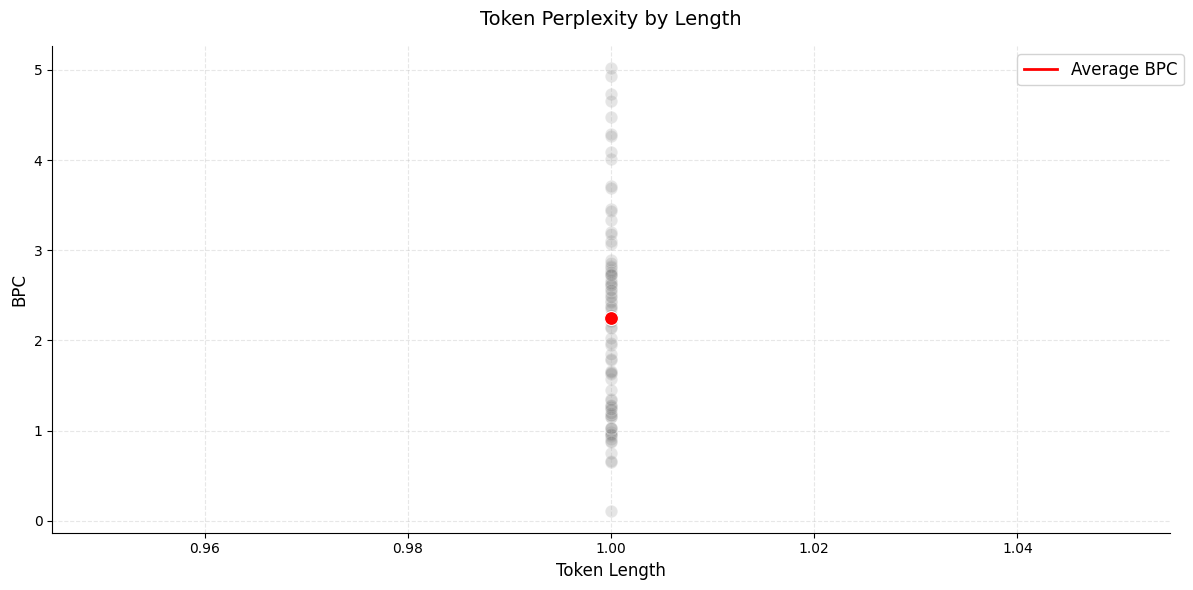

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


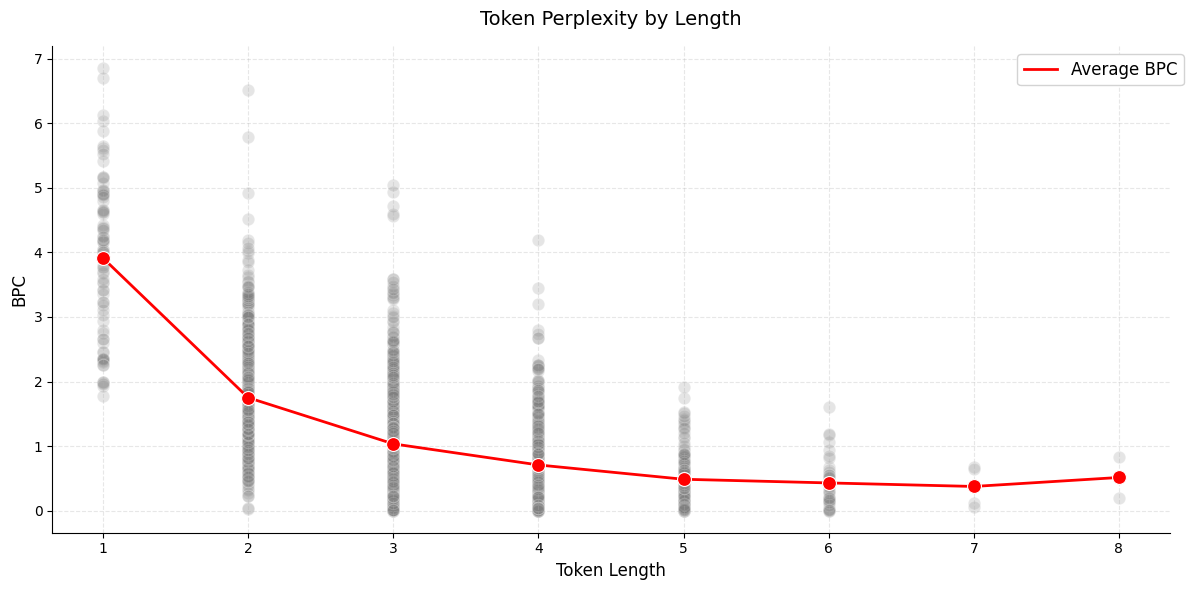

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


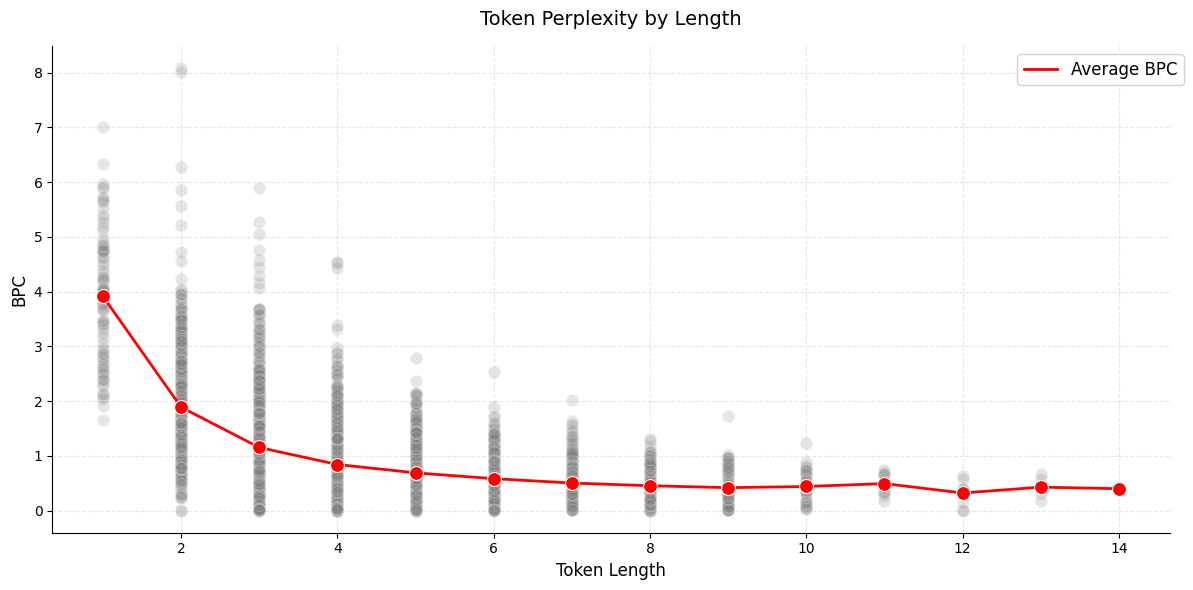

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


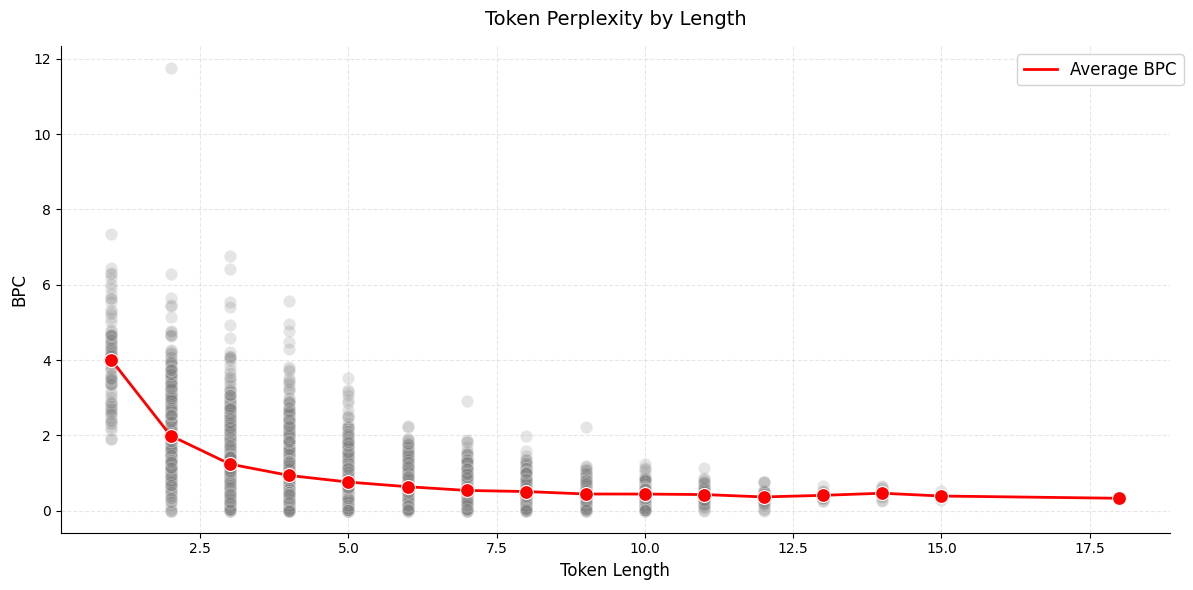

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


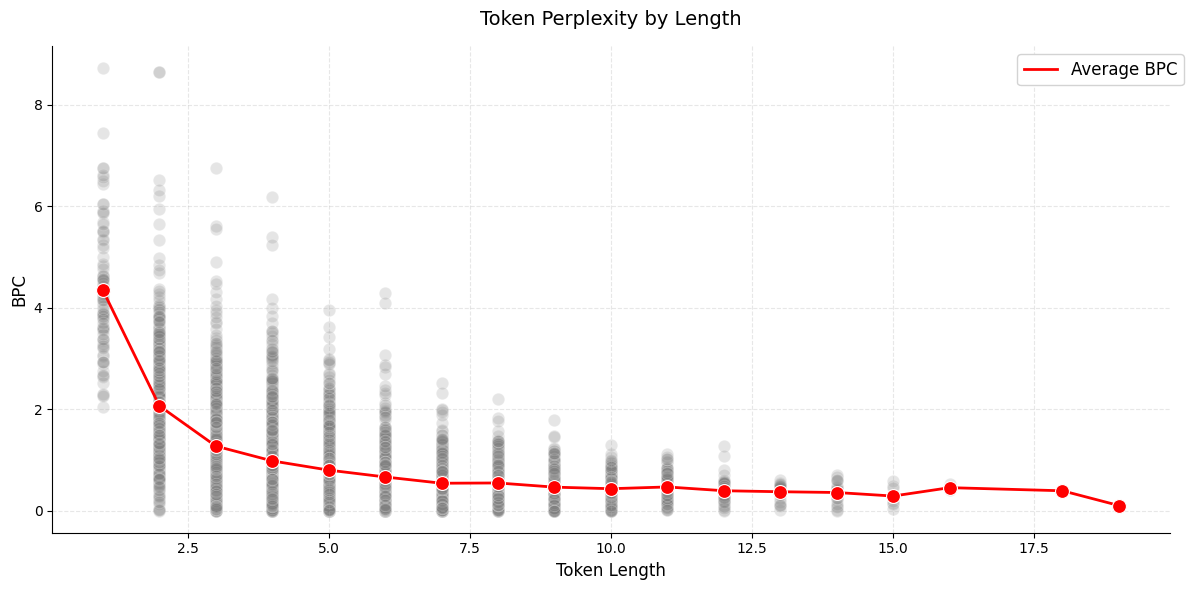

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


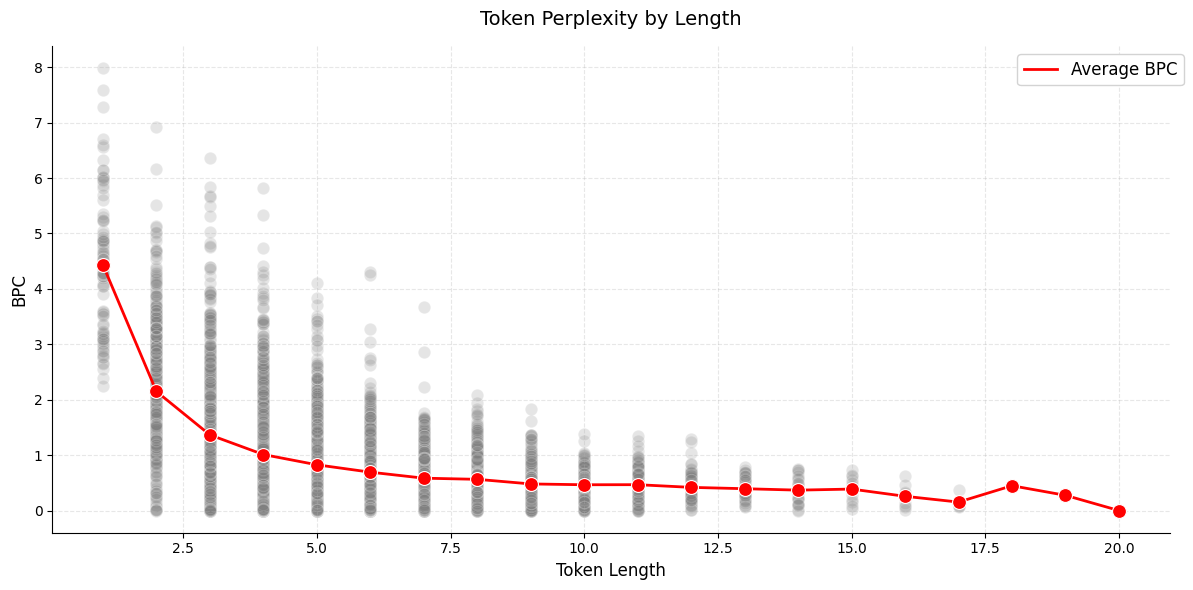

In [1]:
from plot import * 

increase_run_pkls = glob.glob("../run7/base/info*.pkl") + [pkl for pkl in glob.glob("../run7/increase_iter*/*.pkl") if "_raw" not in pkl]
increase_run_pkls = sorted(increase_run_pkls, key=lambda x: int(x.split('iter')[-1].split('/')[0]) if 'iter' in x else 0)[:6]

# token --> iter_num (this token is added at which iteration) | so we could track the perplexity of current token at each iteration 
token_iter = {} 

iter_info = {} 

for iter_no, pkl_path in enumerate(increase_run_pkls):
    
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
    token_counts = info['token_count_dict']
    token_bpcs = info['token_bpc_dict']
    
    # update iter no. for each token 
    for token, count in token_counts.items():
        if token not in token_iter:
            token_iter[token] = iter_no
    
    # avg bpc by length & iter
    avg_perplexity_by_length = compute_avg_token_bpc_by_length(token_bpcs)
    avg_bpc_by_iter = compute_avg_token_bpc_by_iter(token_bpcs, token_iter)
    
    plot_token_perplexity_by_length(token_bpcs, avg_perplexity_by_length)
        
    max_perplexity_tokens = sorted(token_bpcs.items(), key=lambda x: x[1], reverse=True)[:10]
    min_perplexity_tokens = sorted(token_bpcs.items(), key=lambda x: x[1])[:10]
    
    iter_info[iter_no] = {
        "avg_bpc_by_length": avg_perplexity_by_length,
        "avg_bpc_by_iter": avg_bpc_by_iter,
        "max_perplexity_tokens": max_perplexity_tokens,
        "min_perplexity_tokens": min_perplexity_tokens,
        "token_bpcs": token_bpcs,
        "token_counts": token_counts
    } 

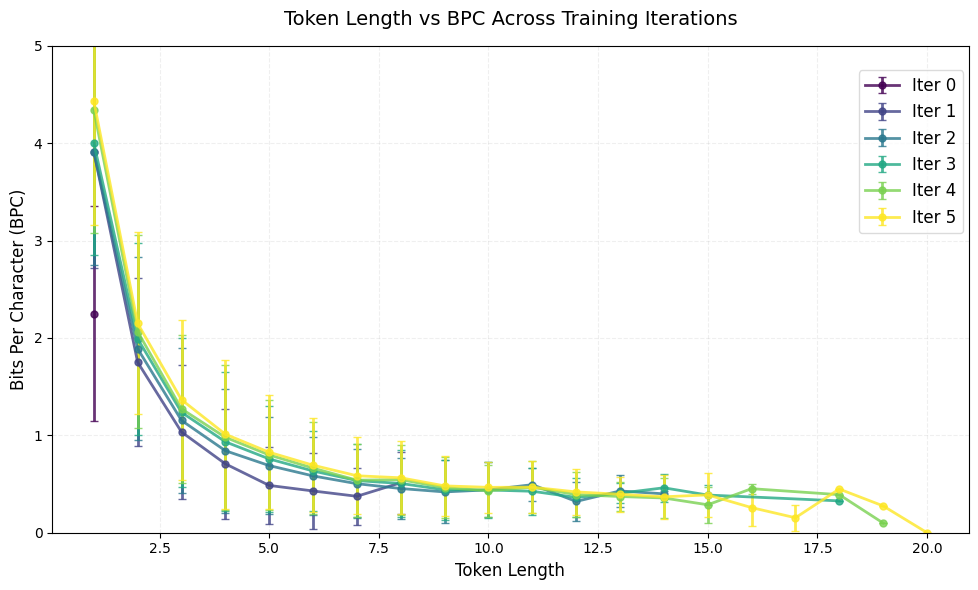

In [4]:
# Create figure with adjusted size and style
plt.figure(figsize=(10, 6))
# plt.style.use('seaborn')

# Plot lines for each iteration with improved styling
colors = plt.cm.viridis(np.linspace(0, 1, len(iter_info)))
for idx, (iter_no, info) in enumerate(iter_info.items()):
    avg_bpc_by_length = info["avg_bpc_by_length"]
    token_bpcs = info["token_bpcs"]
    
    # Calculate standard deviation
    std_by_length = {}
    for token, bpc in token_bpcs.items():
        length = len(token)
        if length not in std_by_length:
            std_by_length[length] = []
        std_by_length[length].append(bpc)
    
    std_by_length = {k: np.std(v) for k, v in std_by_length.items()}
    
    # Sort and plot
    x = list(avg_bpc_by_length.keys())
    y = list(avg_bpc_by_length.values())
    yerr = [std_by_length.get(length, 0) for length in x]
    points = sorted(zip(x, y, yerr))
    x_sorted, y_sorted, yerr_sorted = zip(*points)
    
    plt.errorbar(x_sorted, y_sorted, yerr=yerr_sorted,
                label=f'Iter {iter_no}',
                color=colors[idx],
                alpha=0.8,
                fmt='-o',
                capsize=3,
                markersize=5,
                linewidth=2)

# Customize the plot
plt.title('Token Length vs BPC Across Training Iterations', 
          fontsize=14, pad=15)
plt.xlabel('Token Length', fontsize=12)
plt.ylabel('Bits Per Character (BPC)', fontsize=12)

# Add grid with custom style
plt.grid(True, alpha=0.2, linestyle='--')

# Customize legend
plt.legend(bbox_to_anchor=(0.88, 0.95), 
          loc='upper left',
          borderaxespad=0,
          fontsize=12,
          frameon=True,
          framealpha=0.8,
          edgecolor='lightgray')

# Set y-axis limits to focus on the relevant range
plt.ylim(0, 5)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


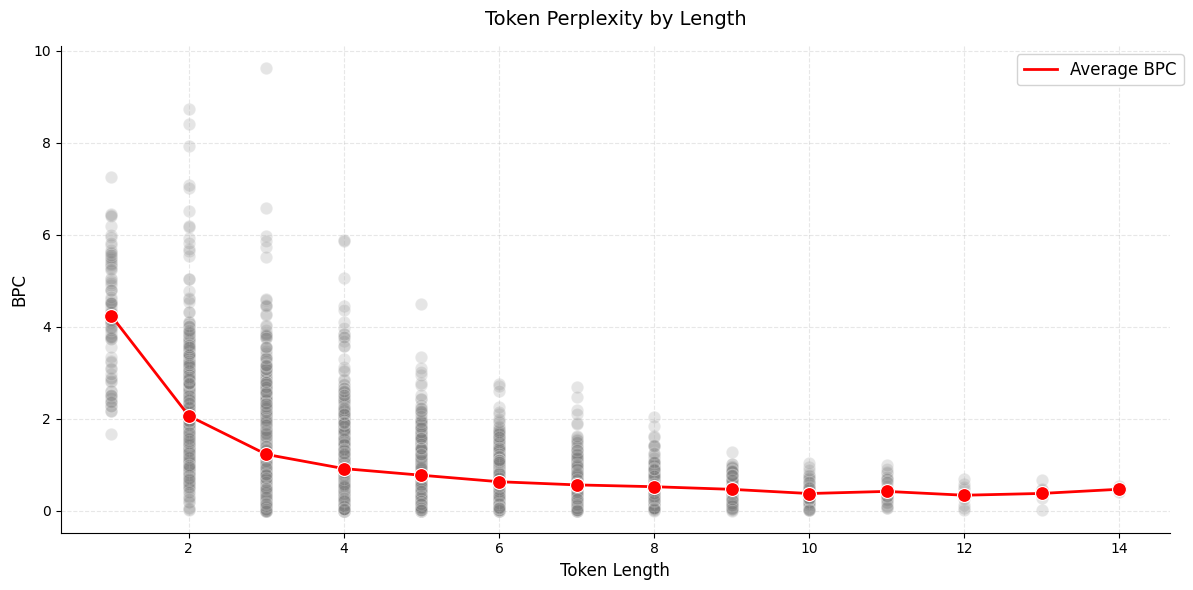


Top 10 highest perplexity tokens:
Token: 'Lio' (length 3), BPC: 9.626
Token: '#U' (length 2), BPC: 8.736
Token: '),' (length 2), BPC: 8.410
Token: '7t' (length 2), BPC: 7.924
Token: '(' (length 1), BPC: 7.264
Token: 'ww' (length 2), BPC: 7.070
Token: 'nr' (length 2), BPC: 7.007
Token: '5)*' (length 3), BPC: 6.588
Token: 'yt' (length 2), BPC: 6.516
Token: ''' (length 1), BPC: 6.447

Top 10 lowest perplexity tokens:
Token: 'howev' (length 5), BPC: 0.000
Token: 'osl' (length 3), BPC: 0.000
Token: 'Zea' (length 3), BPC: 0.000
Token: ' calend' (length 7), BPC: 0.000
Token: 'msel' (length 4), BPC: 0.000
Token: 'philoso' (length 7), BPC: 0.000
Token: '-kno' (length 4), BPC: 0.000
Token: 'tty ' (length 4), BPC: 0.000
Token: 'atso' (length 4), BPC: 0.000
Token: 'ccl' (length 3), BPC: 0.000


In [ ]:
# Can you further mix these vocabulary together ? Random encoding order ?
# load the token stat inside here 
from matplotlib import pyplot as plt 
import glob, pickle
from plot import plot_token_length_distribution, plot_token_perplexity_by_length

pkl_dir = "../run6"
pkl_path = pkl_dir + "/increase_iter*/*.pkl"
vocab_sizes = []
bpcs = []


for pkl_path in glob.glob(pkl_path):
    if "_raw" in pkl_path: 
        continue
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        
    # Get token statistics
    token_counts = info['token_count_dict']
    token_bpcs = info['token_bpc_dict']
    
    avg_perplexity_by_length = compute_avg_token_bpc_by_length(token_bpcs)
    compute_avg_token_bpc_by_iter(token_bpcs, token_iter)

    # Visualize average perplexity by token length
    plot_token_perplexity_by_length(token_bpcs, avg_perplexity_by_length)

    # Print some summary statistics
    print("\nTop 10 highest perplexity tokens:")
    sorted_tokens = sorted(token_bpcs.items(), key=lambda x: x[1], reverse=True)[:10]
    for token, bpc in sorted_tokens:
        print(f"Token: '{token}' (length {len(token)}), BPC: {bpc:.3f}")

    print("\nTop 10 lowest perplexity tokens:")
    sorted_tokens = sorted(token_bpcs.items(), key=lambda x: x[1])[:10]
    for token, bpc in sorted_tokens:
        print(f"Token: '{token}' (length {len(token)}), BPC: {bpc:.3f}")
        
    break


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


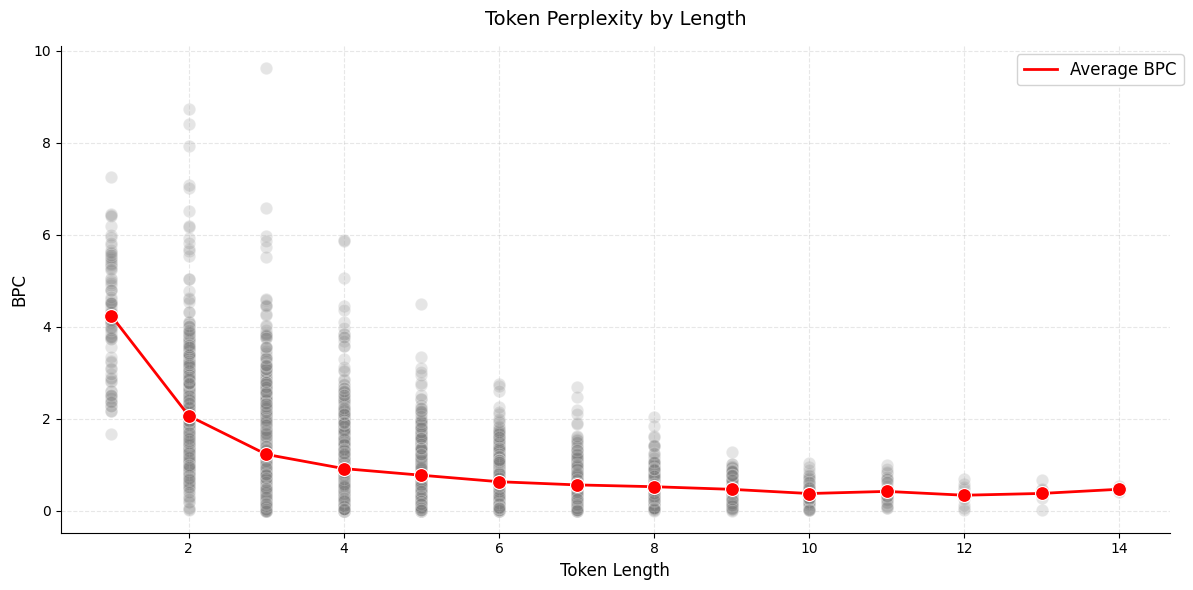

In [22]:
import seaborn as sns

plot_token_perplexity_by_length(token_bpcs, avg_perplexity_by_length)

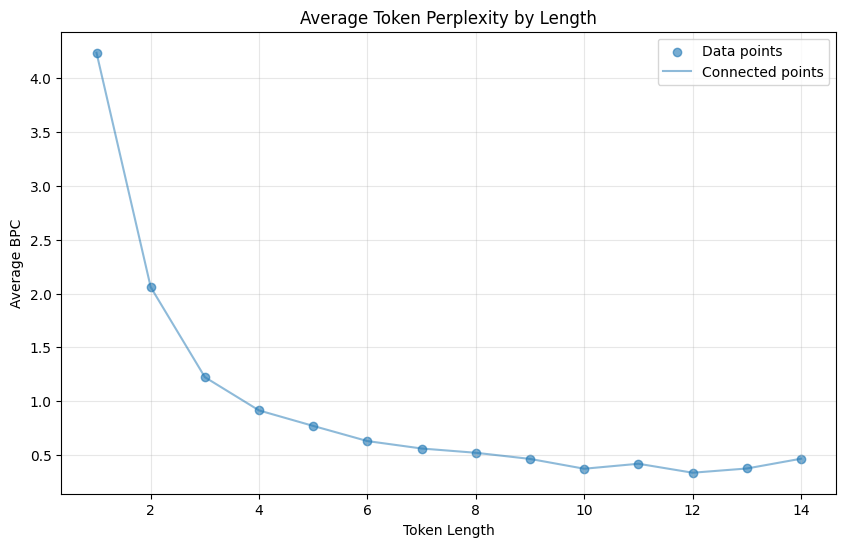

In [8]:
plt.figure(figsize=(10, 6))

# Get data and sort by token length
x = list(avg_perplexity_by_length.keys())
y = list(avg_perplexity_by_length.values())
points = sorted(zip(x, y))  # sort by x values
x_sorted, y_sorted = zip(*points)

# Create scatter plot of the data points
plt.scatter(x_sorted, y_sorted, alpha=0.6, label='Data points')

# Connect consecutive points with lines
plt.plot(x_sorted, y_sorted, '-', alpha=0.5, label='Connected points')

plt.title('Average Token Perplexity by Length')
plt.xlabel('Token Length')
plt.ylabel('Average BPC')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [5]:
info

{'run_idx': 10,
 'bpc': tensor(2.1113),
 'model_type': 'GPT',
 'config': {'n_layer': 6,
  'n_head': 6,
  'n_embd': 384,
  'block_size': 512,
  'bias': False,
  'vocab_size': 35321,
  'dropout': 0.2}}

In [17]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab_comparison
import pandas as pd

vocab_num = 6

data = {}
pkl_dir = "../gpt_tiny"
pkl_path = pkl_dir + "/increase*/*.pkl"
vocab_sizes = [92]
bpcs = [1.7141]
for pkl_path in glob.glob(pkl_path):
    if "_raw" in pkl_path:
        continue
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
# re-order vocab_sizes & bpcs according to increasing value of vocabulary size
sorted_pairs = sorted(zip(vocab_sizes, bpcs), key=lambda x: x[0])
vocab_sizes, bpcs = zip(*sorted_pairs)
vocab_sizes = list(vocab_sizes)[:vocab_num]
bpcs = list(bpcs)[:vocab_num]

data["incre_vocab_curriculum"] = {"vocab_sizes": vocab_sizes, "bpcs": bpcs}
    
pkl_dir = "../gpt_tiny_cm"
pkl_path = pkl_dir + "/increase*/*.pkl"
vocab_sizes = [92]
bpcs = [1.7141]
for pkl_path in glob.glob(pkl_path):
    if "_raw" in pkl_path: 
        continue 
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)    
    
# re-order vocab_sizes & bpcs according to increasing value of vocabulary size
sorted_pairs = sorted(zip(vocab_sizes, bpcs), key=lambda x: x[0])
vocab_sizes, bpcs = zip(*sorted_pairs)
vocab_sizes = list(vocab_sizes)[:vocab_num]
bpcs = list(bpcs)[:vocab_num]
    
data["compute_matching"] = {"vocab_sizes": vocab_sizes, "bpcs": bpcs}
    

# slope = _plot_bpc_vs_vocab_comparison(data, bpcs, increase_vocab_size=True, title="Scaling Vocabulary Curriculum Learning")


In [18]:
data['incre_vocab_curriculum']

{'vocab_sizes': [92, 4320, 7908, 11418, 14853, 18243],
 'bpcs': [1.7141,
  1.5035275220870972,
  1.4700456857681274,
  1.4796061515808105,
  1.491346001625061,
  1.4910551309585571]}

In [19]:
data['compute_matching']

{'vocab_sizes': [92, 4320, 7908, 11418, 12708, 14853],
 'bpcs': [1.7141,
  1.5083783864974976,
  1.5161974430084229,
  1.4923597574234009,
  1.5361995697021484,
  4.409428119659424]}

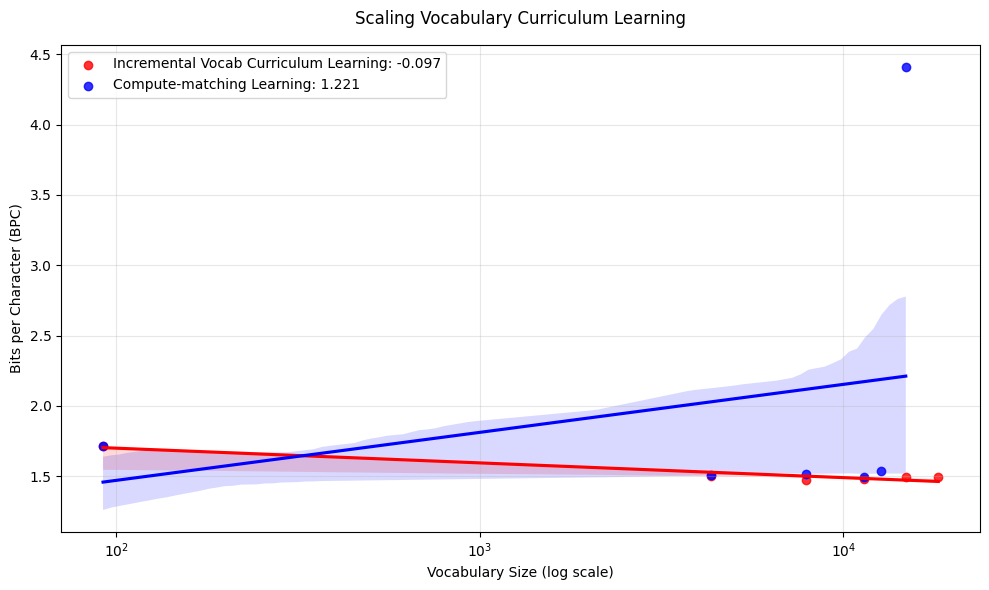

In [20]:
slope = _plot_bpc_vs_vocab_comparison(data, False, 
                                      increase_vocab_size=True, title="Scaling Vocabulary Curriculum Learning")


In [3]:
vocab_sizes

[92, 4359, 7941, 11382, 14819, 18276]

In [4]:
data['incre_vocab_curriculum']

{'vocab_sizes': [92,
  124,
  167,
  2427,
  3268,
  5926,
  4401,
  7979,
  10744,
  18276,
  14468,
  18276,
  407,
  548,
  302,
  225,
  738,
  994,
  1803,
  1339],
 'bpcs': [1.5182369947433472,
  1.5414396524429321,
  1.6194331645965576,
  1.9033781290054321,
  1.8357903957366943,
  1.7524908781051636,
  1.7071272134780884,
  1.8137433528900146,
  1.874107837677002,
  1.9385912418365479,
  1.8464628458023071,
  1.9130115509033203,
  1.7077045440673828,
  1.7981464862823486,
  1.6550776958465576,
  1.6266005039215088,
  1.8657078742980957,
  1.840469241142273,
  1.8203532695770264,
  1.8961224555969238]}

In [5]:
data['compute_matching']

{'vocab_sizes': [225,
  302,
  2427,
  3268,
  14468,
  18276,
  10744,
  7979,
  1803,
  1339,
  18276,
  548,
  407,
  92,
  738,
  994,
  124,
  167,
  4401,
  5926],
 'bpcs': [1.6440823078155518,
  1.646000623703003,
  1.8845767974853516,
  1.938866138458252,
  1.9902162551879883,
  1.9977314472198486,
  1.969947338104248,
  1.8623316287994385,
  1.8549433946609497,
  1.9113085269927979,
  2.008716106414795,
  1.7897956371307373,
  1.7343688011169434,
  1.5062240362167358,
  1.8530313968658447,
  1.8582851886749268,
  1.5535953044891357,
  1.6157413721084595,
  1.7995805740356445,
  1.8406398296356201]}

In [8]:
vocab_sizes[5], bpcs[5]

(18276, 1.9977314472198486)

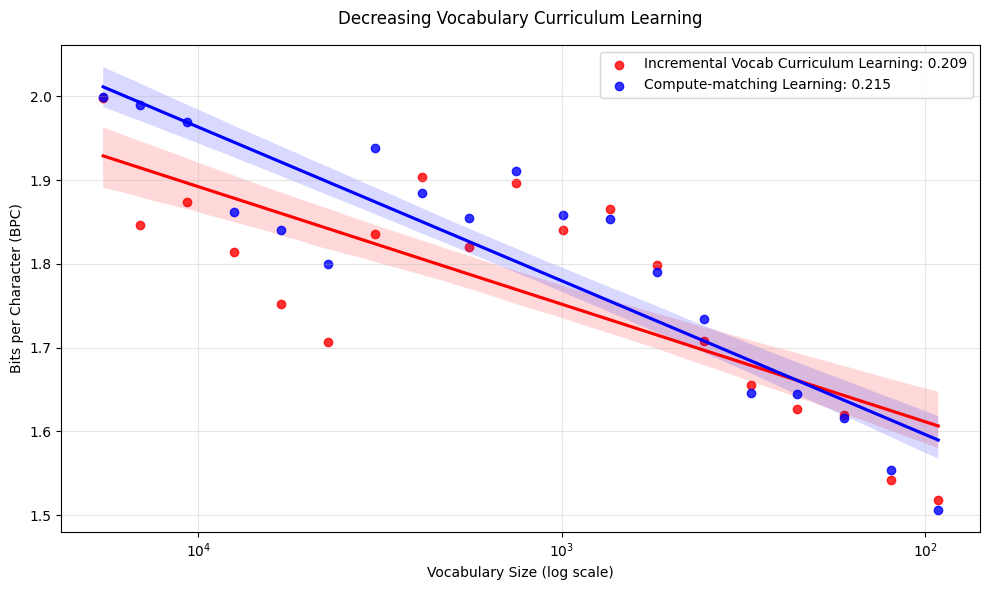

In [2]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab_comparison
import pandas as pd

data = {}
pkl_dir = "../run5"
pkl_path = pkl_dir + "/decrease*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
        if vocab_size == 18276: 
            bpc = 1.9977314472198486
        if vocab_size in vocab_sizes: 
            continue 
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
data["decre_vocab_curriculum"] = {"vocab_sizes": vocab_sizes, "bpcs": bpcs}
    
pkl_dir = "../run5_cm"
pkl_path = pkl_dir + "/decrease*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
        if vocab_size == 18276: 
            bpc = 1.9997314472198486
        if vocab_size in vocab_sizes: 
            continue 
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)    
    
data["compute_matching"] = {"vocab_sizes": vocab_sizes, "bpcs": bpcs}
    

slope = _plot_bpc_vs_vocab_comparison(data, bpcs, increase_vocab_size=False, title="Decreasing Vocabulary Curriculum Learning")


In [9]:
# info['incre_vocab_curriculum']
info.keys()

dict_keys(['run_idx', 'bpc', 'model_type', 'config', 'compute_matching'])

In [2]:
slope

0.09926634685870746

In [5]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab

pkl_dir = "../run5_cm"
pkl_path = pkl_dir + "/increase*.pkl"
vocab_sizes = [92]
bpcs = [1.7141]
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
# slope = _plot_bpc_vs_vocab(vocab_sizes, bpcs, log_scale_vocab=True, increase_vocab_size=True, title="compute-matching vocabulary increase")

In [6]:
slope
# - change x-axis ticks into '10^xx' to illustrate log linear relationship 
# - plot the curriculum incremental learning curve together with compute-matching curve 


0.15737105324245354

In [6]:
vocab_sizes, bpcs

([92, 4359, 25103, 21700, 11382, 7941, 31909, 28527, 35321, 14819, 18276],
 [1.7141,
  1.902695894241333,
  2.084137439727783,
  2.067214012145996,
  2.0338425636291504,
  1.9911859035491943,
  2.0811402797698975,
  2.1014785766601562,
  2.1113409996032715,
  2.0691614151000977,
  2.0813817977905273])

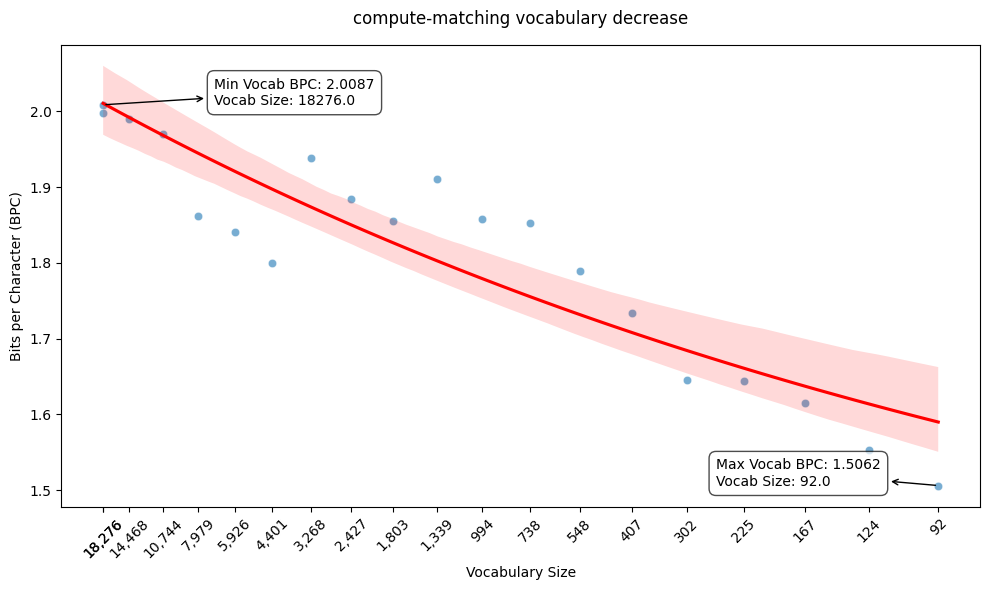

In [5]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab

pkl_dir = "../run5_cm"
pkl_path = pkl_dir + "/decrease*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
_plot_bpc_vs_vocab(vocab_sizes, bpcs, log_scale_vocab=True, increase_vocab_size=False, title="compute-matching vocabulary decrease")

In [6]:
import glob 
import pickle 

pkl_path = "../run4/*_min_vocab.pkl"
pkl_path = glob.glob(pkl_path)[0]

with open(pkl_path, "rb") as f:
    info = pickle.load(f)


In [7]:
info

{'run_idx': 0,
 'bpc': tensor(1.6474),
 'model_type': 'GPT',
 'config': {'n_layer': 6,
  'n_head': 6,
  'n_embd': 384,
  'block_size': 512,
  'bias': False,
  'vocab_size': 92,
  'dropout': 0.2}}

In [8]:
0.1474 / 1.6474

0.08947432317591357

In [5]:
# min-vocab (92) 30k training iterations 
# 1. fixed vocabulary training: 1.6474
# 2. circulary vocabulary learning: 1.50
# 3. decreasing vocabulary learning: 1.568

# max-vocab (18434) 30k training iterations 
# 1. fixed vocabulary training: 2.0356
# 2. increasing vocabulary learning: 1.9022